In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Dataset_Final.csv")

In [70]:
df = pd.read_csv("Dataset_Final.csv")

In [71]:
df.columns

Index(['Sno', 'Song ID', 'Song Name', 'Artist Name', 'Album Name',
       'Release Date', 'Accousticness', 'Dancebility', 'Song Duration',
       'Energy', 'Instrumentalness', 'Key', 'Liveliness', 'Loudness', 'Mode',
       'Speechiness', 'Tempo', 'Time Signature', 'Valence', 'Popularity',
       'Genre'],
      dtype='object')

In [72]:
df.shape

(18000, 21)

In [73]:
df= df.drop(["Sno"],axis = 1)

In [74]:
df = df.drop_duplicates(subset=['Song ID'])

In [75]:
df.shape

(16846, 20)

In [76]:
genre = df[['Genre']]

In [77]:
df.drop(["Song ID", "Song Name", "Artist Name", "Album Name",
         "Release Date", "Genre"],axis = 1,  inplace = True)

In [78]:
df.shape

(16846, 14)

In [ ]:
df.head

<bound method NDFrame.head of        Accousticness  Dancebility  Song Duration  Energy  Instrumentalness  \
0             0.5590        0.703         242946   0.444             0.000   
1             0.4690        0.618         198853   0.443             0.000   
2             0.2410        0.672         215173   0.623             0.000   
3             0.3160        0.726         145706   0.537             0.000   
4             0.0208        0.583         258826   0.786             0.000   
...              ...          ...            ...     ...               ...   
17995         0.0166        0.784         140000   0.310             0.722   
17996         0.7030        0.729         183750   0.124             0.876   
17997         0.8760        0.753         156000   0.525             0.866   
17998         0.8420        0.678         121818   0.421             0.306   
17999         0.8940        0.570         172174   0.250             0.941   

       Key  Liveliness  Loudness 

In [ ]:
display(genre)

,Genre
0,acoustic
1,acoustic
2,acoustic
3,acoustic
4,acoustic
...,...
17995,study
17996,study
17997,study
17998,study


In [ ]:
scaler = MinMaxScaler()
scaler.fit(df)

df = scaler.transform(df)

In [ ]:
df = pd.DataFrame(df, columns = ['Accousticness', 'Dancebility', 'Song Duration',
       'Energy', 'Instrumentalness', 'Key', 'Liveliness', 'Loudness', 'Mode',
       'Speechiness', 'Tempo', 'Time Signature', 'Valence', 'Popularity'])

In [ ]:
df["Genre"] = genre

In [ ]:
lst = np.where((df['Song Duration']*0.00001667)>10)

In [ ]:
print(lst)
print(len(lst[0]))

(array([ 2446,  2672,  2805,  5120,  5538,  5712,  6412,  6458,  7587,
        7824,  8322, 10612, 10811, 10853, 10981, 11162, 11216, 12280,
       14015, 14317]),)
20


In [ ]:
features = (df.columns).tolist()

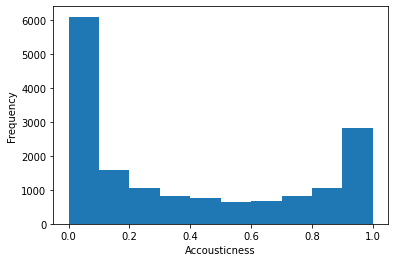

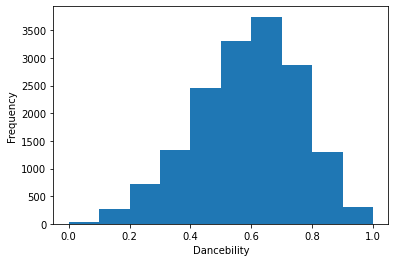

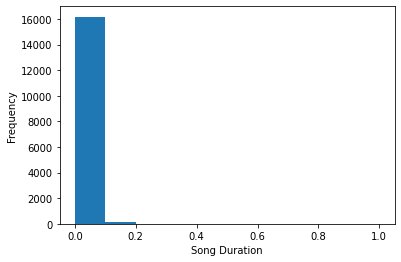

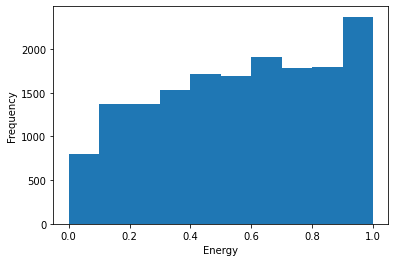

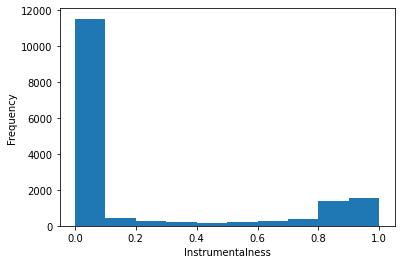

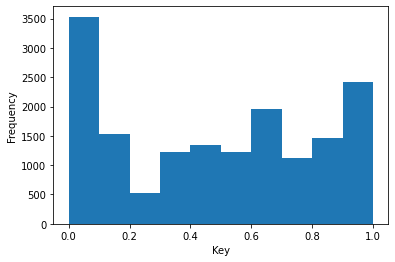

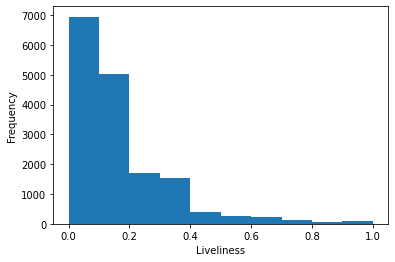

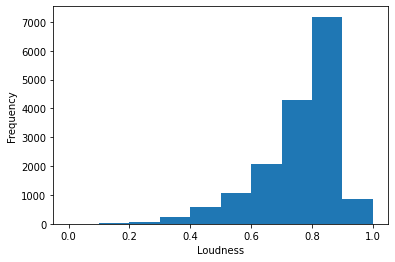

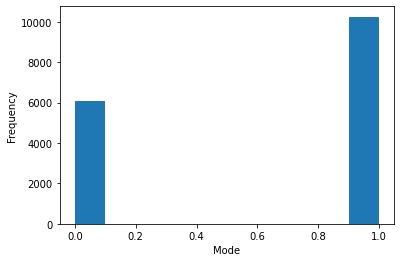

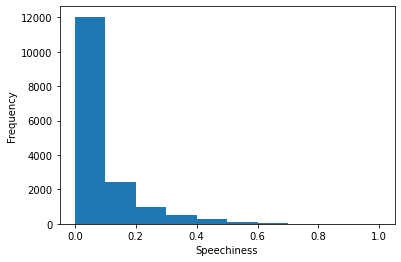

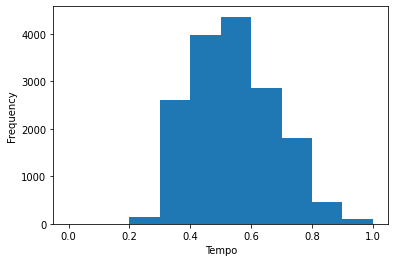

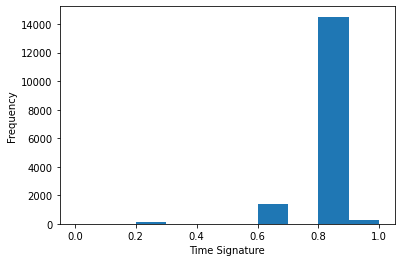

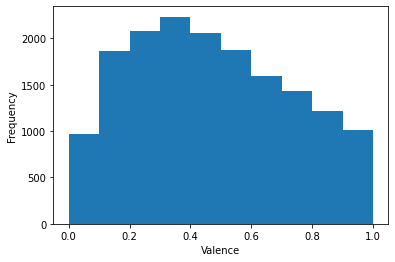

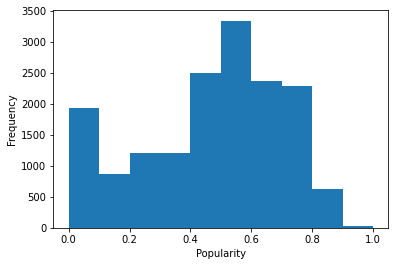

In [ ]:
for i in range(len(features)-1):
  df[features[i]].plot.hist(alpha=1)
  plt.xlabel(features[i])
  plt.show()

In [ ]:
for i in range (len(features)-1):
  for j in range(i+1, len(features)-1):
    sns.scatterplot(x=features[i], y=features[j], hue='Genre', data=df)
    plt.legend(bbox_to_anchor=(1, 1), loc=2)
    plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
for i in range (len(features)-1):
  for j in range(i+1, len(features)-1):
    sns.jointplot(x=df[features[i]], y=df[features[j]], kind='hex',marginal_kws=dict(bins=30, fill=True))
    plt.show()

Output hidden; open in https://colab.research.google.com to view.

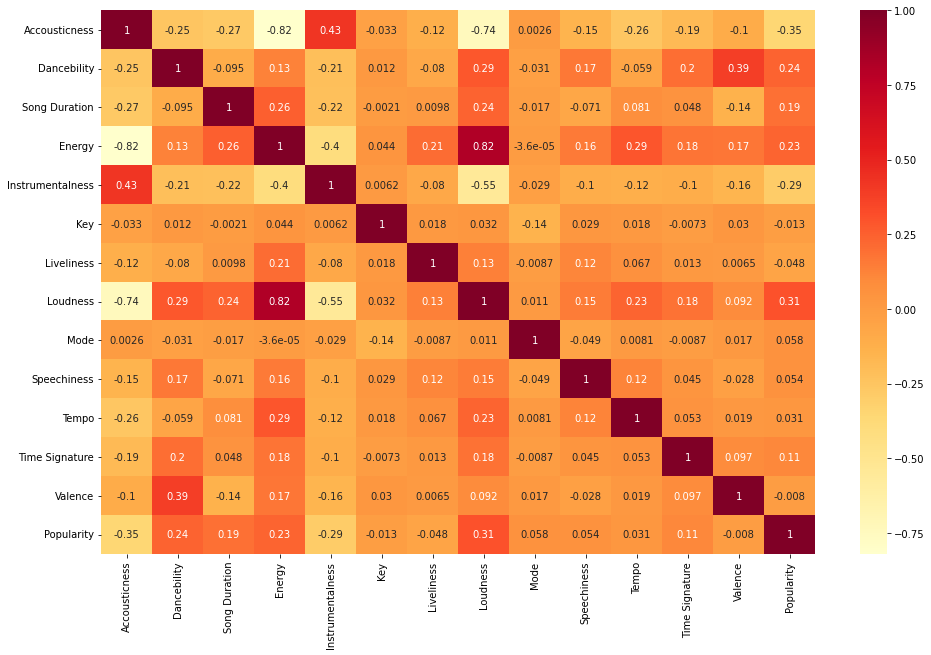

In [ ]:
plt.figure(figsize=(16,10))
sns.heatmap(df.corr(), yticklabels='auto', annot=True, cmap='YlOrRd')
plt.show()

In [ ]:
# sns.pairplot(df, hue = 'Genre', palette='gist_rainbow')
# plt.show()

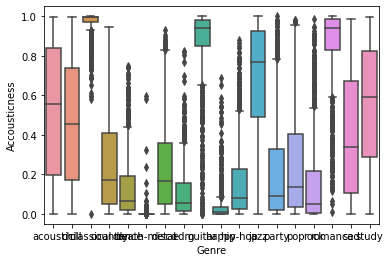

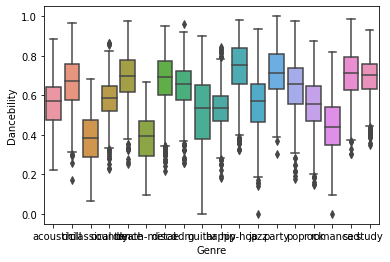

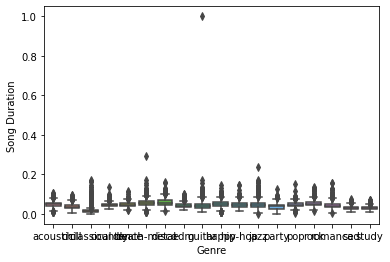

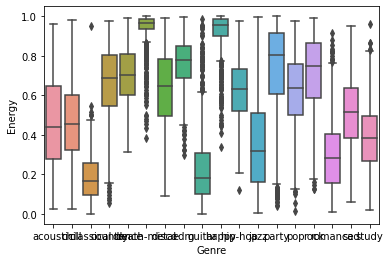

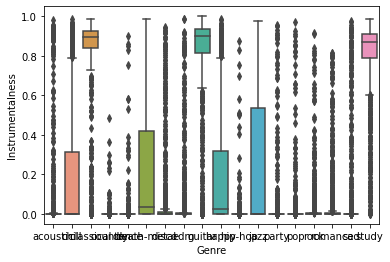

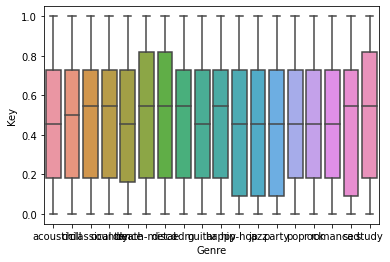

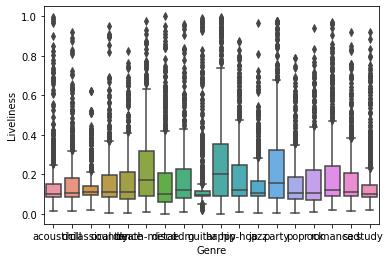

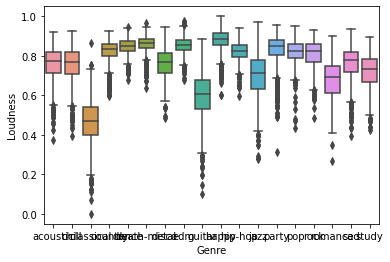

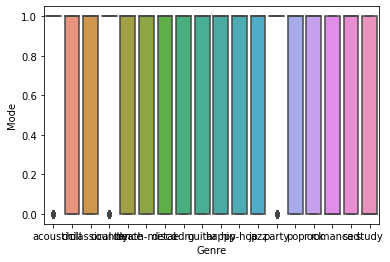

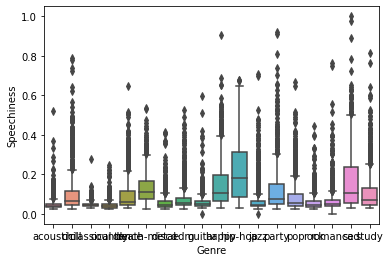

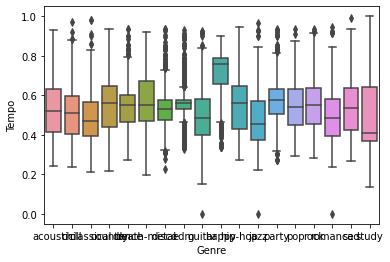

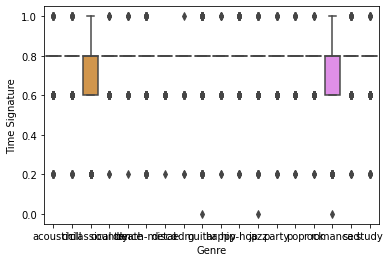

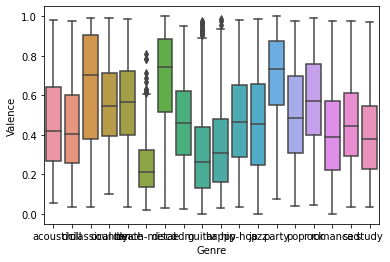

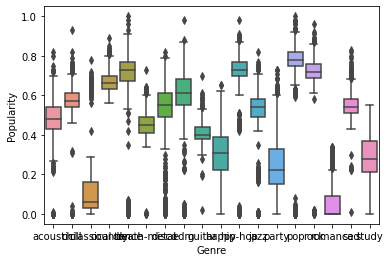

In [ ]:
for i in range(len(features)-1):
  sns.boxplot(data = df, x="Genre", y=features[i])
  plt.show()

In [ ]:
from sklearn.manifold import TSNE


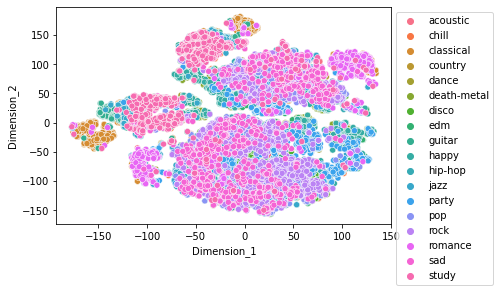

In [ ]:
X_tsne = pd.DataFrame(TSNE(n_components = 2, learning_rate = 'auto', init = 'random', n_iter = 2500, perplexity = 20, random_state=0).fit_transform(df.iloc[:, :-1]), columns = ['Dimension_1','Dimension_2'])
sns.scatterplot(x = X_tsne['Dimension_1'], y = X_tsne['Dimension_2'], hue = df['Genre'],)
  
plt.legend(bbox_to_anchor=(1, 1), loc=2)
plt.show()

In [79]:
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
genre['Genre']= label_encoder.fit_transform(genre['Genre'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [80]:
df

,Accousticness,Dancebility,Song Duration,Energy,Instrumentalness,Key,Liveliness,Loudness,Mode,Speechiness,Tempo,Time Signature,Valence,Popularity
0,0.5590,0.703,242946,0.444,0.000,11,0.0973,-9.331,1,0.0417,150.960,4,0.712,80
1,0.4690,0.618,198853,0.443,0.000,2,0.0829,-9.681,1,0.0526,119.949,4,0.167,82
2,0.2410,0.672,215173,0.623,0.000,9,0.0848,-5.699,1,0.0297,92.018,4,0.617,70
3,0.3160,0.726,145706,0.537,0.000,0,0.0707,-8.896,1,0.1140,96.889,4,0.882,70
4,0.0208,0.583,258826,0.786,0.000,2,0.1880,-3.142,0,0.0301,123.055,4,0.573,73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17995,0.0166,0.784,140000,0.310,0.722,3,0.1140,-11.671,0,0.1000,90.012,4,0.387,12
17996,0.7030,0.729,183750,0.124,0.876,9,0.0993,-11.109,0,0.0855,74.998,4,0.322,18
17997,0.8760,0.753,156000,0.525,0.866,10,0.1080,-4.450,0,0.0834,120.064,4,0.579,16
17998,0.8420,0.678,121818,0.421,0.306,11,0.0951,-9.729,0,0.0522,86.982,4,0.228,16


In [81]:
display(genre)

,Genre
0,0
1,0
2,0
3,0
4,0
...,...
17995,17
17996,17
17997,17
17998,17


In [87]:
df.drop(["Popularity"],axis = 1,  inplace = True)

In [82]:
from sklearn.feature_selection import mutual_info_classif as MIC
mi_score = MIC(df.to_numpy(),genre.to_numpy())
print(mi_score)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0.67971894 0.36952759 0.43310384 0.60336383 0.45262386 0.03339977
 0.17050208 0.56825755 0.03215772 0.2773582  0.43232313 0.04046058
 0.23224828 1.06019404]


In [83]:
df.columns

Index(['Accousticness', 'Dancebility', 'Song Duration', 'Energy',
       'Instrumentalness', 'Key', 'Liveliness', 'Loudness', 'Mode',
       'Speechiness', 'Tempo', 'Time Signature', 'Valence', 'Popularity'],
      dtype='object')

In [84]:
new = pd.DataFrame(mi_score.reshape(1,14), columns = df.columns)
new

,Accousticness,Dancebility,Song Duration,Energy,Instrumentalness,Key,Liveliness,Loudness,Mode,Speechiness,Tempo,Time Signature,Valence,Popularity
0,0.679719,0.369528,0.433104,0.603364,0.452624,0.0334,0.170502,0.568258,0.032158,0.277358,0.432323,0.040461,0.232248,1.060194


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


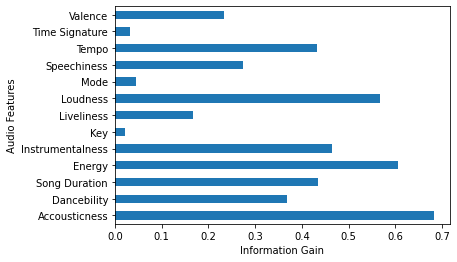

In [88]:
ig= pd.Series(MIC(df.to_numpy(),genre.to_numpy()), df.columns)
ig.plot(kind='barh')
plt.ylabel('Audio Features')
plt.xlabel('Information Gain')
plt.show()